In [17]:
from tensorflow import keras
ae_wo_classifier = keras.models.load_model('model/AE_model/KERAS_check_best_model.h5')
#ae_w_classifier = keras.models.load_model('model/AE_model/KERAS_check_model_w_classifier.h5')

#vae_wo_classifier = keras.models.load_model('model/VAE_model/KERAS_check_model_wo_classifier.h5')
#vae_w_classifier = keras.models.load_model('model/VAE_model/KERAS_check_model_w_classifier.h5')

## Check sparsity
Make a quick check that the model was indeed trained sparse. We'll just make a histogram of the weights of the 1st layer, and hopefully observe a large peak in the bin containing '0'. Note logarithmic y axis.

% of zeros = 0.75


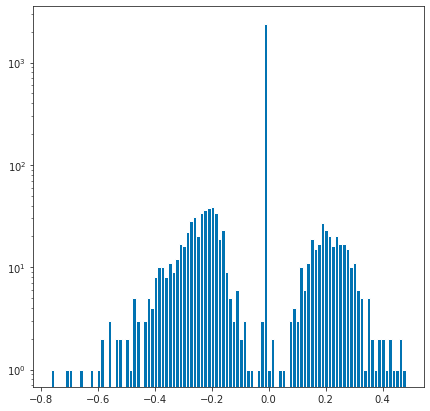

In [28]:
import numpy as np
from matplotlib import pyplot as plt

w = ae_wo_classifier.layers[1].weights[0].numpy()
h, b = np.histogram(w, bins=100)
plt.figure(figsize=(7,7))
plt.bar(b[:-1], h, width=b[1]-b[0])
plt.semilogy()
print('% of zeros = {}'.format(np.sum(w==00)/np.size(w)))

In [26]:
import plotting
from plotting import makeRoc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
model_ref = load_model('model/AE_model/KERAS_check_best_model.h5')

import MNIST_dataset as mnist
size_final = 10

data_zoom = mnist.MNISTData(size_final=size_final, color_depth=5)

y_ref = model_ref.predict(data_zoom.x_test)
y_prune = ae_wo_classifier.predict(data_zoom.x_test)
y_test = data_zoom.y_test
print("Accuracy unpruned: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_ref, axis=1))))
print("Accuracy pruned:   {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_prune, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = makeRoc(y_test, y_ref, classes)
plt.gca().set_prop_cycle(None) # reset the colors
_ = plotting.makeRoc(y_test, y_prune, classes, linestyle='--')

from matplotlib.lines import Line2D
lines = [Line2D([0], [0], ls='-'),
         Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend
leg = Legend(ax, lines, labels=['unpruned', 'pruned'],
            loc='lower right', frameon=False)
ax.add_artist(leg)

ImportError: cannot import name 'makeRoc' from 'plotting' (C:\Users\loren\miniconda3\envs\MLinPhysics\lib\site-packages\plotting\__init__.py)

# Make an hls4ml config & model

In [4]:
import hls4ml
config = hls4ml.utils.config_from_keras_model(ae_wo_classifier, granularity='model')
print("-----------------------------------")
print("Configuration")
print(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(ae_wo_classifier,
                                                       hls_config=config,
                                                       output_dir='model/AE_model/hls4ml_prj',
                                                       part='xcu250-figd2104-2L-e')


Interpreting Model
Topology:
Layer name: encoder_input, layer type: Input
Layer name: dense_12, layer type: Dense
  -> Activation (relu), layer name: dense_12
Layer name: dense_13, layer type: Dense
  -> Activation (relu), layer name: dense_13
Layer name: encoder_output, layer type: Dense
  -> Activation (relu), layer name: encoder_output
Layer name: dense_14, layer type: Dense
  -> Activation (relu), layer name: dense_14
Layer name: dense_15, layer type: Dense
  -> Activation (relu), layer name: dense_15
Layer name: ecoder_output, layer type: Dense
  -> Activation (sigmoid), layer name: ecoder_output
-----------------------------------
Configuration
{'Model': {'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}}
-----------------------------------
Interpreting Model
Topology:
Layer name: encoder_input, layer type: InputLayer, input shapes: [[None, 100]], output shape: [None, 100]
Layer name: dense_12, layer type: Dense, input shapes: [[None, 100]], output shape: [N

In [8]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\loren\\AppData\\Local\\Temp\\tmp5r1ekaww.png'

In [7]:
hls_model.build(csim=False)

Project myproject_prj does not exist. Rerun "hls4ml build -p model/AE_model/hls4ml_prj".


In [6]:
hls4ml.report.read_vivado_report('model/AE_model/hls4ml_prj/')


Project myproject_prj does not exist. Rerun "hls4ml build -p model/AE_model/hls4ml_prj".
Project myproject_prj does not exist. Rerun "hls4ml build -p model/AE_model/hls4ml_prj/".


# Compile, predict

In [9]:
hls_model.compile()

import MNIST_dataset as mnist
size_final = 10

data_zoom = mnist.MNISTData(size_final=size_final, color_depth=5)
test = data_zoom.x_test

plt.imshow(test[0].reshape(size_final,size_final), cmap='gray_r')

test = np.ascontiguousarray(test)
y_hls = hls_model.predict(test)

Writing HLS project
Done


FileNotFoundError: Could not find module 'c:\Users\loren\Desktop\CODE\Electronics_Project\DL-model-for-FPGA\model\AE_model\hls4ml_prj\firmware\myproject-fEe86a0b.so' (or one of its dependencies). Try using the full path with constructor syntax.